1

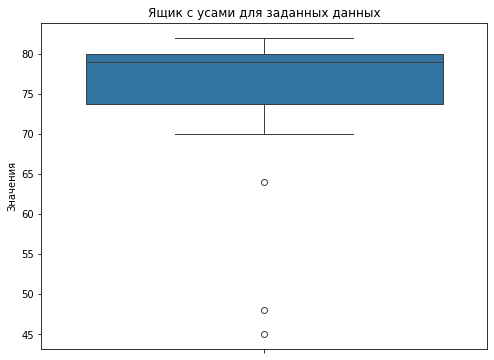

a. Квартили:
  Q1 (25%): 73.75
  Q2 (Медиана, 50%): 79.0
  Q3 (75%): 80.0

b. Межквартильный размах (IQR): 6.25 

c. Основные статистики:
  Минимум: 45
  Q1 (25%): 73.75
  Медиана (Q2, 50%): 79.0
  Q3 (75%): 80.0
  Максимум: 82

d. Потенциальные выбросы: [64, 45, 48]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Данные
data = np.array([79, 80, 80, 80, 74, 80, 80, 79, 64, 78, 73, 78, 74, 45, 81, 48, 80, 82, 82, 70])

# a. Получение квартилей
Q1 = np.percentile(data, 25)
Q2 = np.percentile(data, 50) 
Q3 = np.percentile(data, 75)

# b. Межквартильный размах
IQR = Q3 - Q1

# c. Минимум, Q25, медиана, Q75 и максимум
min_val = np.min(data)
max_val = np.max(data)
stats = {
    'Минимум': min_val,
    'Q1 (25%)': Q1,
    'Медиана (Q2, 50%)': Q2,
    'Q3 (75%)': Q3,
    'Максимум': max_val
}

# d. Поиск выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = [x for x in data if x < lower_bound or x > upper_bound]

# e. Построение boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data)
plt.title('Ящик с усами для заданных данных')
plt.ylabel('Значения')
plt.show()

# Вывод результатов
print("a. Квартили:")
print(f"  Q1 (25%): {Q1}")
print(f"  Q2 (Медиана, 50%): {Q2}")
print(f"  Q3 (75%): {Q3}\n")

print("b. Межквартильный размах (IQR):", IQR, "\n")

print("c. Основные статистики:")
for key, value in stats.items():
    print(f"  {key}: {value}")

print("\nd. Потенциальные выбросы:", outliers if outliers else "Выбросы не обнаружены")

2

In [ ]:
#!/bin/bash
#SBATCH --job-name=fastqc_analysis
#SBATCH --output=fastqc.log
#SBATCH --error=fastqc.err
#SBATCH --time=1:00:00
#SBATCH --mem=2G
#SBATCH --cpus-per-task=2

# Загрузка необходимых модулей
module load fastqc multiqc 

# Создание директории для результатов
mkdir -p fastqc_results

# Запуск FastQC
fastqc -o fastqc_results -t $SLURM_CPUS_PER_TASK *.fastq.gz

# Создание общего отчета
multiqc fastqc_results -n multiqc_report